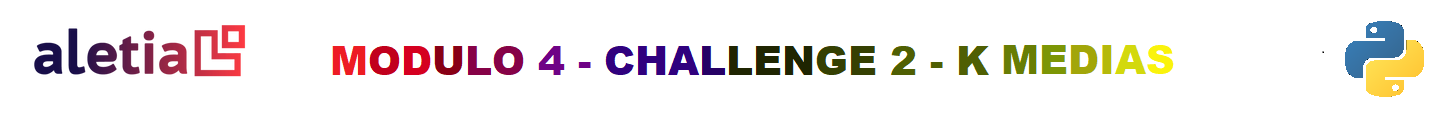

In [1]:
# Algunas bibliotecas necesarias
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

## Repaso k-medias

El algoritmo *k*-medias sirve para encontrar un número previamente determinado de grupos a partir de un espacio con multiples dimensiones (es decir múltiples variables)

Suposiciones base del modelo de *k*-medias:

- El "centro del conglomerado" es la media aritmética de todos los puntos pertenecientes al conglomerado.
- Cada punto está más cerca de su propio centro de clúster que de otros centros de clúster.



Para los primeros ejercicios vamos a crear 4 grupos de datos en 2 dimensiones.

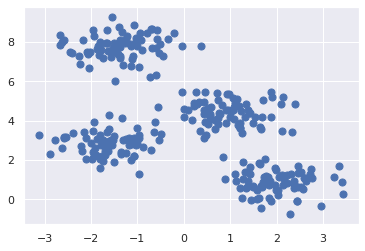

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

A pesar de que es un problema fácil de resolver a simple vista. Buscamos que esto lo haga automáticamente un algorítmo, en este caso *k*-medias. Usemos sklearn para resolver el problema

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 2 3 2 0 0 1 3 2 2 1 2 3 2 0 3 3 0 1 1 0 0 3 1 1 3 0 3 1 3 2 2 3 2 2 2 2
 2 1 0 3 1 3 3 1 1 2 1 2 0 1 0 2 0 0 1 2 1 2 0 2 3 2 1 1 1 2 0 2 1 3 1 2 1
 1 2 1 3 0 2 0 3 0 0 2 3 0 3 2 2 3 0 2 1 1 3 0 0 3 1 2 0 2 0 3 0 0 3 2 3 1
 1 0 2 0 3 2 0 0 3 1 0 1 0 0 0 0 1 0 1 2 1 1 0 2 1 1 2 3 2 2 1 3 1 3 1 2 3
 2 2 2 3 2 3 0 1 2 1 0 3 2 3 3 0 3 1 1 3 0 3 3 2 0 3 1 2 0 0 3 1 0 3 1 1 3
 3 3 3 0 2 3 1 3 3 1 1 1 3 1 2 3 1 0 1 3 2 1 2 3 2 3 1 3 3 2 1 1 0 0 3 2 0
 0 1 0 1 3 2 2 3 3 2 3 0 1 3 0 1 2 1 0 3 0 2 2 2 2 1 1 2 3 1 0 3 1 1 1 0 0
 2 3 3 1 0 2 1 3 2 3 0 0 1 1 3 0 0 0 3 2 2 0 0 3 0 0 0 2 1 2 3 0 0 2 2 2 0
 0 3 2 1]


Sklearn nos devuelve una lista de la etiqueta del grupo al que pertenece. 

Vamos a ver los resultados coloreando los datos con esas etiquetas.

Sklearn también nos devuelve los centroides. Grafiquémoslos igualmente

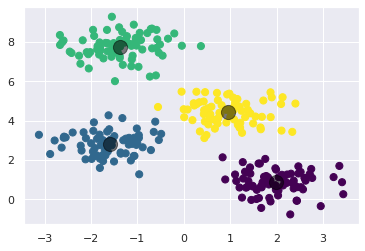

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Para encontrar los grupos, sklearn utiliza un algoritmo llamado Expectation maximization (E-M), este algorítmo es ampliamente utilizado en ciencia de datos pero *k*-medias es un caso particular muy fácil de entender. El procedimiento es el siguiente:
  1. Inventa aleatoriamente los centroides
  2. Repite los siguientes pasos hasta hallar la convergencia:
    - Paso-E: Asigna cada uno de los ejemplos al centroide mas cercano formando un grupo para cada centroide
    - Paso-M: Re calcula los centroides como el promedio de los puntos asignados a su grupo

A continuación podemos ver un diagrama del algorítmo:

![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)

## Reto 1:

Anteriormente usamos la bilbioteca sklearn para hacer los clusters de la variable $X$ pero para este reto no utilizaremos ninguna implementación previa de *k*-means.

Escribe tu propio código para crear una función "***mi_algoritmo_kmeans***" que tenga los siguientes parámetros:
  - **X**: variable multidimensional
  - **n_clusters**: número de clusters a crear
  - **semilla**: semilla que servirá para replicar la inicialización aleatoria

La función debe devolver los siguientes datos:
  - **centroides**: un arreglo con las coordenadas de los centroides
  - **etiquetas**: un arreglo con las etiquetas de los grupos (clusters)

Sugerencia:

Puedes apoyarte (pero no es necesario) de las siguientes funciones:
  - from sklearn.metrics import pairwise_distances_argmin
  - np.random.RandomState(semilla)
  - np.random.RandomState(semilla).permutation(*parametros*)

In [5]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin

In [6]:
(X[0]-np.random.RandomState(2).permutation(2))

array([-0.16314316,  2.13635938])

In [7]:
semilla = 2
rs = np.random.RandomState(semilla)
centroids = rs.uniform(size=(4,2))
centroids

array([[0.4359949 , 0.02592623],
       [0.54966248, 0.43532239],
       [0.4203678 , 0.33033482],
       [0.20464863, 0.61927097]])

(300, 2)


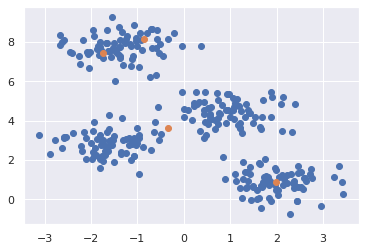

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def update_assignments(data, centroids):
    c = []
    for i in data:
        c.append(np.argmin(np.sum((i.reshape((1, 2)) - centroids) ** 2, axis=1)))
    return c

def update_centroids(data, num_clusters, assignments):
    cen = []
    for c in range(len(num_clusters)):
        cen.append(np.mean([data[x] for x in range(len(data)) if assignments[x] == c], axis=0))
    return cen

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0) # (50, 2), 50 data points, 2 dimensions each
print(X.shape)

centroids = (np.random.normal(size=(4, 2)) * 0.0001) + np.mean(X, axis=0).reshape((1, 2))
for i in range(100):
    a = update_assignments(X, centroids)
    centroids = update_centroids(X, centroids, a)
    centroids = np.array(centroids)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1])
plt.show()

In [9]:
np.mean([df[i][0] for i in range(len(df)) if df[i][2] == 3]),np.mean([df[i][1] for i in range(len(df)) if df[i][2] == 3])

NameError: name 'df' is not defined

In [ ]:
n_clusters = 4
semilla = 2
#rs = np.random.RandomState(semilla)
centroides = (np.random.normal(size=(4, 2)) * 0.0001) + np.mean(X, axis=0).reshape((1, 2))
print(centroides)
Y = pairwise_distances_argmin(X,centroides)
Y = Y.reshape(1,300)
df = np.concatenate((X,Y.T), axis=1)
centroides = []
for cluster in range(n_clusters):
    print(cluster)
    centroides.append((np.mean([df[i][0] for i in range(len(df)) if df[i][2] == cluster]),np.mean([df[i][1] for i in range(len(df)) if df[i][2] == cluster])))

[[-0.00632108  3.96789367]
 [-0.00640867  3.96792223]
 [-0.00660333  3.96780646]
 [-0.00646609  3.96775206]]
0
1
2
3


In [ ]:
centroides

[(1.2965343781494114, 4.091166232614835),
 (-1.0411609801305275, 7.456064085121015),
 (-1.6735355327451265, 3.4556494882490223),
 (1.7856895380316133, 0.9246841915860498)]

In [10]:
n_clusters = 4
n = 0
for i in range(2):
    if n == 0:
      centroides = (np.random.normal(size=(4, 2)) * 0.0001) + np.mean(X, axis=0).reshape((1, 2))
      Y = pairwise_distances_argmin(X,centroides)
      Y = Y.reshape(1,300)
      print(X.shape,Y.shape)
      df = np.concatenate((X,Y.T), axis=1)
      centroides = []
      for cluster in range(n_clusters):
          centroides.append((np.mean([df[i][0] for i in range(len(df)) if df[i][2] == cluster]),np.mean([df[i][1] for i in range(len(df)) if df[i][2] == cluster])))
          
      #etiquetas = etiquetas.reshape(1,300)
      centroides = np.array(centroides)
      etiquetas = pairwise_distances_argmin(X,centroides)
      n = n + 1
    else:
      etiquetas = etiquetas.reshape(1,300)
      df = np.concatenate((X,etiquetas.T), axis=1)
      centroides = []
      for cluster in range(n_clusters):
          centroides.append((np.mean([df[i][0] for i in range(len(df)) if df[i][2] == cluster]),np.mean([df[i][1] for i in range(len(df)) if df[i][2] == cluster])))
      centroides = np.array(centroides)
      etiquetas = pairwise_distances_argmin(X,centroides)

(300, 2) (1, 300)


/home/no/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/no/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

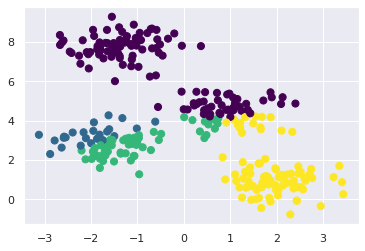

In [12]:
def mi_algoritmo_kmeans(X, n_clusters, semilla=2):
  n = 0
  for i in range(2):
    if n == 0:
      centroides = (np.random.normal(size=(4, 2)) * 0.0001) + np.mean(X, axis=0).reshape((1, 2))
      Y = pairwise_distances_argmin(X,centroides)
      Y = Y.reshape(1,300)
      df = np.concatenate((X,Y.T), axis=1)
      centroides = []
      for cluster in range(n_clusters):
          centroides.append((np.mean([df[i][0] for i in range(len(df)) if df[i][2] == cluster]),np.mean([df[i][1] for i in range(len(df)) if df[i][2] == cluster])))
          
      #etiquetas = etiquetas.reshape(1,300)
      centroides = np.array(centroides)
      etiquetas = pairwise_distances_argmin(X,centroides)
      n = n + 1
    else:
      for i in range(100):
        etiquetas = etiquetas.reshape(1,300)
        f = np.concatenate((X,etiquetas.T), axis=1)
        centroides = []
        for cluster in range(n_clusters):
            centroides.append((np.mean([df[i][0] for i in range(len(df)) if df[i][2] == cluster]),np.mean([df[i][1] for i in range(len(df)) if df[i][2] == cluster])))
        centroides = np.array(centroides)
        etiquetas = pairwise_distances_argmin(X,centroides)
  return centroides, etiquetas

# Vamos a probar la función en la variable X previamente creada
centroides, etiquetas = mi_algoritmo_kmeans(X, 4)

# Veamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=etiquetas,
            s=50, cmap='viridis');

Compara esta gráfica resultante con la gráfica anterior. Deberíamos tener resultados muy similares.

Es importante conocer las limitaciones de los algorítmos que usamos. Por ello, como parte de esta serie de retos exploraremos algunas de estas limitaciones.

## Reto 2:

Repite el ejercicio anterior (utilizando tu función) pero esta vez indica al algorímto que cree 3 clusters en vez de 4. Comparte tus conclusiones.

'\nEscribe aquí tus conclusiones:\n\n'

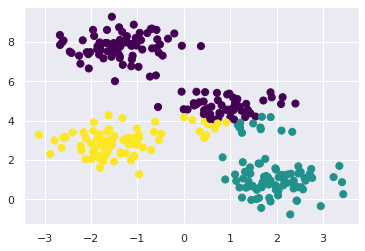

In [13]:
# Coloca aquí tu código
centroides, etiquetas = mi_algoritmo_kmeans(X, 3)

# Veamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=etiquetas,
            s=50, cmap='viridis');


'''
Escribe aquí tus conclusiones:

'''

## Reto 3:

La variable X que creamos tiene 2 dimensiones

In [14]:
X.shape

(300, 2)

Vamos a tomar una de estas dimensiones y multiplicarla por el escalar $e=100$ y visualicemos nuestro nuevo dataset $X$_$reescala$

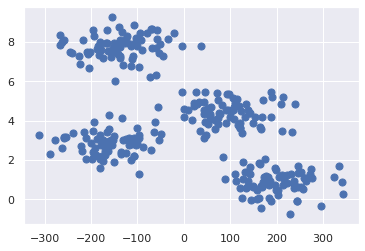

In [15]:
e = 100
X_reescala = np.stack((e*X[:, 0], X[:, 1]), axis=1)
plt.scatter(X_reescala[:, 0], X_reescala[:, 1], s=50);

La gráfica luce idéntica. Sin embargo nota como el eje $horizontal$ tiene valores 10 veces mas grandes

Ahora aplica el alogrítmo de *k*-medias para crear 4 grupos pero esta vez sobre las variables $X$_$reescala$ y escribe tus conclusiones sobre los resultados

'\nEscribe aquí tus conclusiones:\n\n'

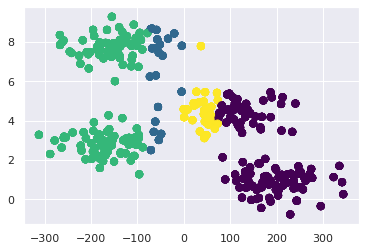

In [36]:
# Coloca aquí tu código
centroides, etiquetas = mi_algoritmo_kmeans(X_reescala, 4)

# Veamos los resultados
for i in range(10):
    try:
        plt.scatter(X_reescala[:, 0], X_reescala[:, 1], c=etiquetas,
                    s=50, cmap='viridis');
    except:
        pass
'''
Escribe aquí tus conclusiones:

'''

## Reto 4 (opcional):

Los colores en computación suelen ser representados como una combinación de números asociados a los colores *red*, *green*, *blue*

veamos un ejemplo:

In [28]:
#!pip install sty
from sty import fg, bg, ef, rs
from sty import Style, RgbFg

rmax = 255
gmax = 255
bmax = 255
salto = 50

for r in range(0,rmax,salto):
  for g in range(0,gmax,salto):
    for b in range(0,bmax,salto):
      fg.color = Style(RgbFg(r, g, b))
      texto = fg.color + chr(9608)*3 + ' r=' + str(r) + ', g=' + str(g) + ', b=' + str(b)
      print(texto)

███ r=0, g=0, b=0
███ r=0, g=0, b=50
███ r=0, g=0, b=100
███ r=0, g=0, b=150
███ r=0, g=0, b=200
███ r=0, g=0, b=250
███ r=0, g=50, b=0
███ r=0, g=50, b=50
███ r=0, g=50, b=100
███ r=0, g=50, b=150
███ r=0, g=50, b=200
███ r=0, g=50, b=250
███ r=0, g=100, b=0
███ r=0, g=100, b=50
███ r=0, g=100, b=100
███ r=0, g=100, b=150
███ r=0, g=100, b=200
███ r=0, g=100, b=250
███ r=0, g=150, b=0
███ r=0, g=150, b=50
███ r=0, g=150, b=100
███ r=0, g=150, b=150
███ r=0, g=150, b=200
███ r=0, g=150, b=250
███ r=0, g=200, b=0
███ r=0, g=200, b=50
███ r=0, g=200, b=100
███ r=0, g=200, b=150
███ r=0, g=200, b=200
███ r=0, g=200, b=250
███ r=0, g=250, b=0
███ r=0, g=250, b=50
███ r=0, g=250, b=100
███ r=0, g=250, b=150
███ r=0, g=250, b=200
███ r=0, g=250, b=250
███ r=50, g=0, b=0
███ r=50, g=0, b=50
███ r=50, g=0, b=100
███ r=50, g=0, b=150
███ r=50, g=0, b=200
███ r=50, g=0, b=250
███ r=50, g=50, b=0
███ r=50, g=50, b=50
███ r=50, g=50, b=100
███ r=50, g=50, b=150
███ r=50, g=50, b=200
███ r=50, g=50

Como podemos  observar, la escala de *red*, *green*, *blue* va de 0 a 255
es decir podemos crear $255^3 = 16581375$ combinaciones de colores diferentes

Las imagenes estan formadas por pixeles en esta escala de colores

Interpreta *red*, *green*, *blue* como 3 dimensiones y crea 16 clusters de colores.

Con los centroides de estos clusters crea 16 colores e imprimelos como en el código anterior.

Bonus: Utiliza estos 16 colores para recrear una imagen pero solamente utilizando estos 16 colores.

### Ejemplo:

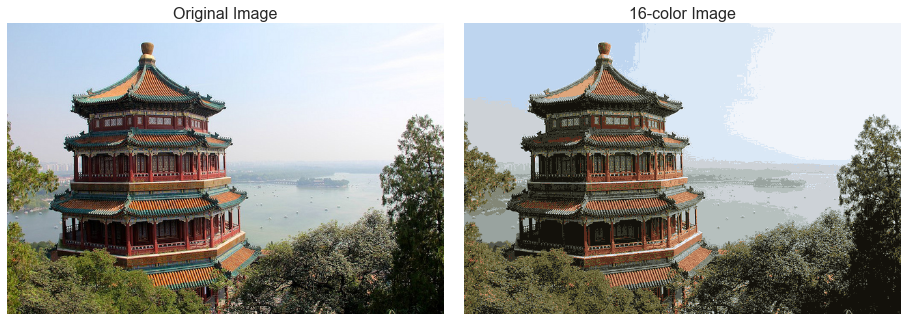

In [43]:
import cv2
image = cv2.imread('download.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [44]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [45]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [46]:
# number of clusters (K)
k = 16
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [47]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [51]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

In [53]:
from PIL import Image as im

In [54]:
data = im.fromarray(segmented_image)

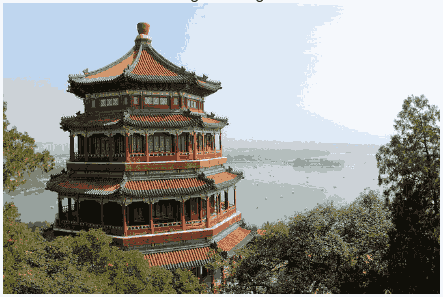

In [55]:
data